# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
'''# 建立新欄位
max_income = max(app_train["AMT_INCOME_TOTAL"])
min_income = min(app_train["AMT_INCOME_TOTAL"])
cut_bin = [0, max_income/4, max_income/2, max_income*3/4, max_income]
app_train["equal_freq_INCOME_TOTAL"] = pd.cut(app_train["AMT_INCOME_TOTAL"], cut_bin)
app_train["equal_freq_INCOME_TOTAL"].value_counts()'''

'# 建立新欄位\nmax_income = max(app_train["AMT_INCOME_TOTAL"])\nmin_income = min(app_train["AMT_INCOME_TOTAL"])\ncut_bin = [0, max_income/4, max_income/2, max_income*3/4, max_income]\napp_train["equal_freq_INCOME_TOTAL"] = pd.cut(app_train["AMT_INCOME_TOTAL"], cut_bin)\napp_train["equal_freq_INCOME_TOTAL"].value_counts()'

In [6]:
# 比對 DAYS_BIRTH 和 AMT_INCOME_TOTAL 的關係

In [7]:
# 檢查資料有沒有缺失值
print("app_train['DAYS_BIRTH']缺失值總數:", app_train['DAYS_BIRTH'].isnull().sum())
print("app_train['AMT_INCOME_TOTAL']缺失值總數:", app_train["AMT_INCOME_TOTAL"].isnull().sum())

app_train['DAYS_BIRTH']缺失值總數: 0
app_train['AMT_INCOME_TOTAL']缺失值總數: 0


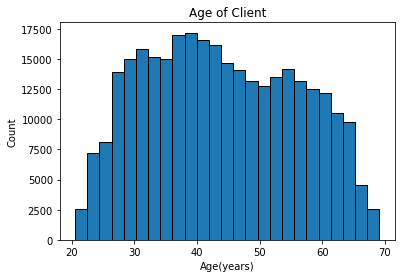

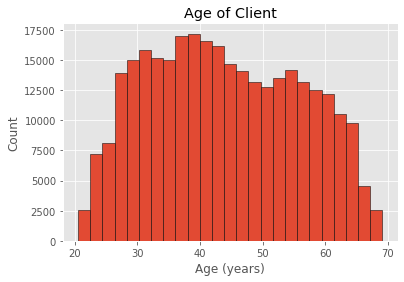

In [8]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 ，因為資料中是負數)
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age(years)'); plt.ylabel('Count');
plt.show()

#改變繪圖樣式
plt.style.use('ggplot')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

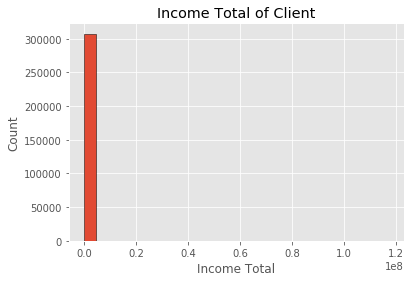

In [9]:
# 資料整理 AMT_INCOME_TOTAL
# 下方的直方圖有點奇怪，通常是因為右邊有極大的離群值。
plt.hist(app_train['AMT_INCOME_TOTAL'],edgecolor = 'k', bins = 25)
plt.title('Income Total of Client'); plt.xlabel('Income Total'); plt.ylabel('Count');
plt.show()

In [10]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [11]:
q_99 = np.quantile(app_train['AMT_INCOME_TOTAL'], q=0.99)
q_100 = np.quantile(app_train['AMT_INCOME_TOTAL'], q=1)

# 可以發現有極大的離群值，所以我們要把它去掉，這樣直方圖才會正常。
print('q_99 : ',q_99)
print('q_100 : ',q_100)

q_99 :  472500.0
q_100 :  117000000.0


Text(0.5, 0, 'AMT_INCOME_TOTAL')

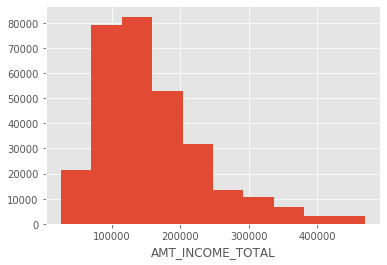

In [13]:
#除去離群值:
app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99)]['AMT_INCOME_TOTAL'].hist()
plt.xlabel('AMT_INCOME_TOTAL')


In [14]:
(app_train['DAYS_BIRTH']/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
'''
從之前的圖、descrube()都可以看到年齡做小20，最大69歲，所以
我們將年齡每5歲為一組來觀察 歲數 和 'AMT_INCOME_TOTAL'之間的關係。
'''
# 特徵離散化
# 首先將'DAYS_BIRTH'內容轉成一個新的DataFrame另外存放(app_data)。
income_age = app_train[['AMT_INCOME_TOTAL', 'DAYS_BIRTH']]
income_age['YEARS_BIRTH'] = income_age['DAYS_BIRTH']/365

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# 將年齡資料離散化
# 建立新的column來存放分組區間，根據'YEARS_BIRTH'從20~70歲，每5歲一組。
income_age['YEARS_BINNED'] = pd.cut(income_age['YEARS_BIRTH'], bins=np.linspace(20, 70, num=11))
income_age.head(10)

C:\Users\workshop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AMT_INCOME_TOTAL,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,202500.0,9461,25.920548,"(25.0, 30.0]"
1,270000.0,16765,45.931507,"(45.0, 50.0]"
2,67500.0,19046,52.180822,"(50.0, 55.0]"
3,135000.0,19005,52.068493,"(50.0, 55.0]"
4,121500.0,19932,54.608219,"(50.0, 55.0]"
5,99000.0,16941,46.413699,"(45.0, 50.0]"
6,171000.0,13778,37.747945,"(35.0, 40.0]"
7,360000.0,18850,51.643836,"(50.0, 55.0]"
8,112500.0,20099,55.065753,"(55.0, 60.0]"
9,135000.0,14469,39.641096,"(35.0, 40.0]"


In [17]:
# 根據income_age_group 分組的column內容 進行分組。
# income_age內容依據'YEARS_BINNED'分組後，在依據分組內容做平均。
income_age_group = income_age.groupby('YEARS_BINNED').mean()
print('income_age_group.shape : ', income_age_group.shape)
print('income_age.shape : ', income_age.shape)

income_age_group.shape :  (10, 3)
income_age.shape :  (307511, 4)


In [18]:
income_age_group

,AMT_INCOME_TOTAL,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",145349.196965,8532.795625,23.377522
"(25.0, 30.0]",164764.078910,10155.219250,27.822518
"(30.0, 35.0]",178096.685310,11854.848377,32.479037
"(35.0, 40.0]",179617.542456,13707.908253,37.555913
"(40.0, 45.0]",181633.860249,15497.661233,42.459346
"(45.0, 50.0]",179306.475713,17323.900441,47.462741
"(50.0, 55.0]",171307.989238,19196.494791,52.593136
"(55.0, 60.0]",158608.647408,20984.262742,57.491131
"(60.0, 65.0]",144782.885738,22780.547460,62.412459


Text(0.5, 1.0, 'Age relate to INCOME_TOTAL')

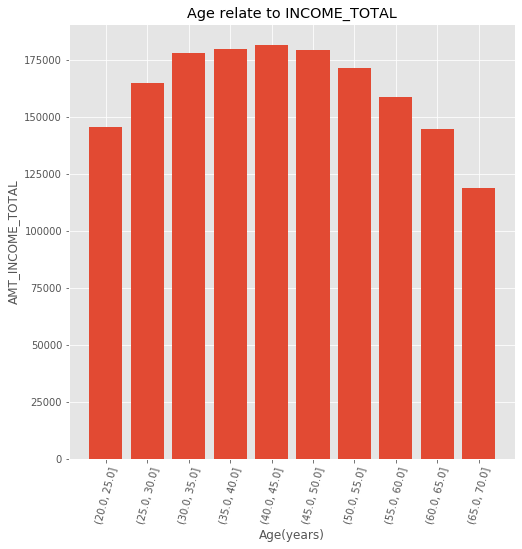

In [19]:
plt.figure(figsize = (8, 8))

# 繪製groupby後的圖  X:分組年齡   Y:總收入
# 下一行也可以這樣寫plt.bar(income_age_group.index.astype(str), income_age_group['AMT_INCOME_TOTAL'])
plt.bar(range(len(income_age_group.index)), income_age_group['AMT_INCOME_TOTAL'])
plt.xlabel('Age(years)');plt.ylabel('AMT_INCOME_TOTAL')
plt.xticks(range(len(income_age_group.index)), income_age_group.index, rotation = 75)
plt.title('Age relate to INCOME_TOTAL')

In [20]:
import seaborn as sns

Text(0.5, 1.0, 'Age relate to INCOME_TOTAL')

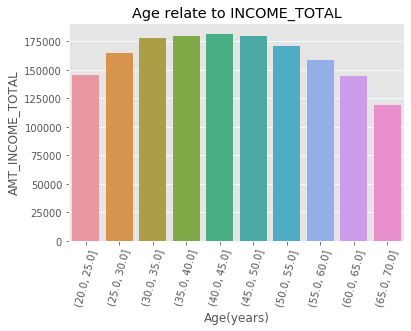

In [23]:
sns.barplot(income_age_group.index.astype(str), income_age_group['AMT_INCOME_TOTAL'])
plt.xlabel('Age(years)');plt.ylabel('AMT_INCOME_TOTAL')
plt.xticks(range(len(income_age_group.index)), income_age_group.index, rotation = 75)
plt.title('Age relate to INCOME_TOTAL')